In case of Donald Trump's influence on Twitter we did it in two parts after observing that out of 3500 tweets for each dataset, 3393 matched (See dataset_difference_test.ipynb).
We decided to make a second part for this particular case and conduct the sentiment analysis on the 107 different tweets. 
The query was with the same filters as in the case of Elon Musk, we suspect that the ban of Donald Trump Twitter account affected the matched tweets between the two datasets.

In [1]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


In [2]:
# export the cleaned tweets to csv files
df_before = pd.read_csv("Clean\clean_DT_before.csv")
df_after = pd.read_csv("Clean\clean_DT_after.csv")

Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [3]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(5)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,How to tell someone is extra deep in the cul...,0.50,-0.266667
1,1,13: 247 If the FBI were investigating a group...,0.50,0.500000
2,2,Great reporting and helping save democracy ...,0.75,0.800000
3,3,"@45thMakaveli 45th, you see an obsession w...",0.00,0.000000
4,4,86: Don't forget this bro: _FTX,0.00,0.000000


In [4]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(5)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,Let's repeat this: Kevin McCarthy wished that...,0.0,0.0
1,1,_SC _ICJ _12 Trump 2024 👍🏼,0.0,0.0
2,2,Let’s the for the 6POLITICALPRISONERs. I can...,0.7,-0.5
3,3,_in_Vegas The difference between Two Leaders...,0.0,0.0
4,4,Twitter Files reveal ⁦⁩ ban came after ⁦⁩ othe...,0.0,0.0


Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

Before Elon Musk

In [5]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head()

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,How to tell someone is extra deep in the cul...,0.50,-0.266667,Negative
1,1,13: 247 If the FBI were investigating a group...,0.50,0.500000,Positive
2,2,Great reporting and helping save democracy ...,0.75,0.800000,Positive
3,3,"@45thMakaveli 45th, you see an obsession w...",0.00,0.000000,Neutral
4,4,86: Don't forget this bro: _FTX,0.00,0.000000,Neutral


After Elon Musk

In [6]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head()

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,Let's repeat this: Kevin McCarthy wished that...,0.0,0.0,Neutral
1,1,_SC _ICJ _12 Trump 2024 👍🏼,0.0,0.0,Neutral
2,2,Let’s the for the 6POLITICALPRISONERs. I can...,0.7,-0.5,Negative
3,3,_in_Vegas The difference between Two Leaders...,0.0,0.0,Neutral
4,4,Twitter Files reveal ⁦⁩ ban came after ⁦⁩ othe...,0.0,0.0,Neutral


The ratio of the sentiment in both situations of Donald Trump (Before and After Elon Musk) by using scatter plot, pie plot, bar plot

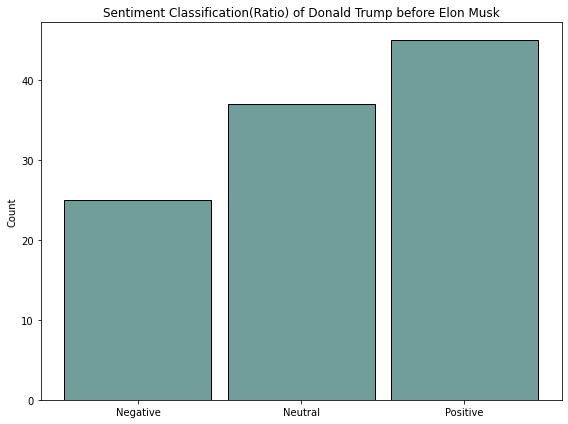

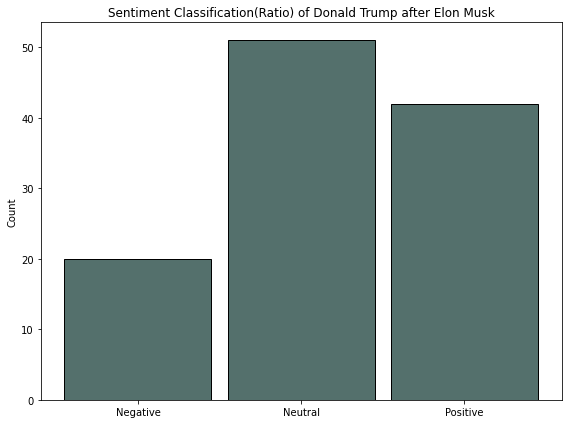

In [7]:
#The ratio of the sentiment before Elon Musk
f1 = plt.figure(figsize = (8,6))
sb.histplot(df_before.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) of Donald Trump before Elon Musk')
plt.tight_layout()


#The ratio of the sentiment after Elon Musk
f2 = plt.figure(figsize = (8,6))
sb.histplot(df_after.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#1B403B', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) of Donald Trump after Elon Musk')
plt.tight_layout()

f1.savefig("Images/BeforeTrumpBar.pdf", bbox_inches='tight')
f2.savefig("Images/AfterTrumpBar.pdf", bbox_inches='tight')

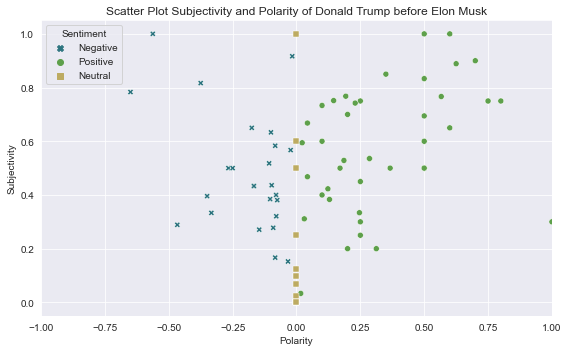

In [8]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump before Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

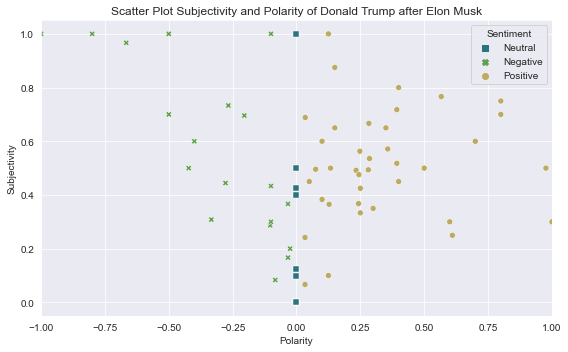

In [9]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

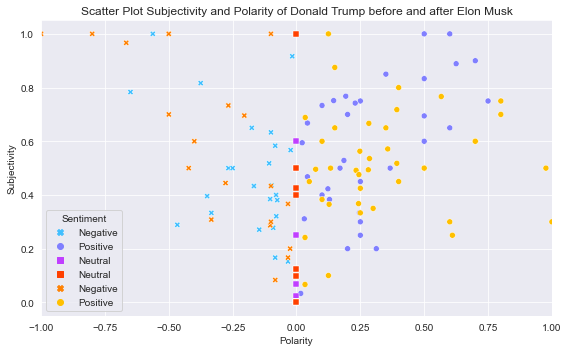

In [10]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'cool').set(xlim=(-1,1))
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'autumn').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump before and after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()



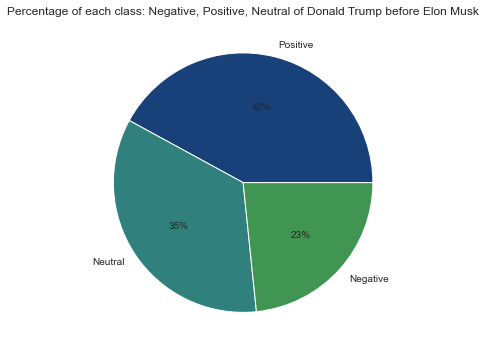

In [11]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before
f1 = plt.figure(figsize = (10, 5))
data = df_before['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of Donald Trump before Elon Musk')
plt.tight_layout()

f1.savefig("Images/BeforeTrumpPie.pdf", bbox_inches='tight')


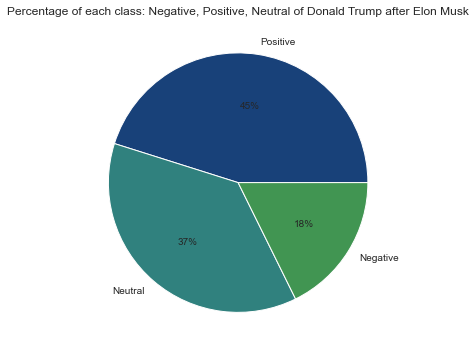

In [12]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after
f2 = plt.figure(figsize = (10, 5))
data = df_after['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of Donald Trump after Elon Musk')
plt.tight_layout()

f2.savefig("Images/AfterTrumpPie.pdf", bbox_inches='tight')